In [ ]:
from keras.datasets import imdb



In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
#the argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows
#you to work with vector data of manageable size

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
len(train_data)

25000

In [ ]:
len(test_data)

25000

In [ ]:
len(test_data)

25000

In [ ]:
train_data[0]
# Here numbers represent "some words" and every number here is actually not number, it is basically a category so we also need one hot encoding

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
len(train_data[0])

218

1.Refined: punctuation removed, stopwords(ase words jinky meaning sy sentence ki meaning change na ho. e.g I eat apple ma sy "I" ko remove kr dain tu koi khas frq nhi pry ga) removed.

2.Lemmatization: words ko root word ma convert kr deta ha e.g: ideally if you study daily you will get good marks.An ideal student works hard.
"ideallY aor "ideal" aik he word hai.so convert ho hoga something like "ideal.
Jis ki waja sy repeation khtm hojati hai aor vocab size b kam hojati hai

Lemmatization is the process of reducing a word to its base or root form, known as the lemma, while still preserving its meaning in the language. The base or root form is typically a dictionary form of the word and is usually identical to the infinitive or present tense form of the verb.
For example, the word "am", "is", "are" all have the same lemma "be" and the word "cats" and "cat" have the same lemma "cat".
3.Stemming:

Stemming is the process of reducing a word to its base or root form, known as the stem, by removing its suffixes or affixes. The stem may or may not be a valid word in the language, but it is often used to represent the common base form of related words.


4:Tokenization:give token means hr word ko aik number assign hota hai.

5: Vectorization:



```
There are 25000 reviews for train data.In preprocessing.
*1st of all commas, punctutions etc are removed
* then every words occuracy will be measure
  e.g word "film" occur 25 times, "amazing"-->21 times
* then according to no. of occurance suppose first 10000 words(num_words=1000) will selected and remaining will be discard.

* After that Vectorization happened,In which every word will be given a token in the form of number.
 e.g film--->1
    amazing--->2
    etc

```

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
train_labels[0]

1

In [ ]:

import numpy as np

In [ ]:
#ENCODING the integer sequences into binary matrix
#Here it's not one hot encoding here we are performin BAG OF WORDSS
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
 x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
len(x_train[0])

10000

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
#Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

```
Train:Test:validation
validation data---->some values are taken from Train Data.


memory leak==>validation data achy sy yaad nhi rehta islia remeber hone ky chances kaam hoty hn
```

In [ ]:
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]


In [ ]:
# Training your model
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 78ms/step - loss: 0.5564 - acc: 0.7575 - val_loss: 0.4326 - val_acc: 0.8601
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3536 - acc: 0.8861 - val_loss: 0.3322 - val_acc: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2600 - acc: 0.9171 - val_loss: 0.2994 - val_acc: 0.8826
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2079 - acc: 0.9318 - val_loss: 0.2806 - val_acc: 0.8876
Epoch 5/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1755 - acc: 0.9415 - val_loss: 0.2767 - val_acc: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1496 - acc: 0.9515 - val_loss: 0.3312 - val_acc: 0.8706
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.1288 - acc: 0.9592 - val_loss: 0.2962 - val_acc: 0.8830
Epoch 8/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1107 - a

In [ ]:
history_dict = history.history

In [ ]:
 history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

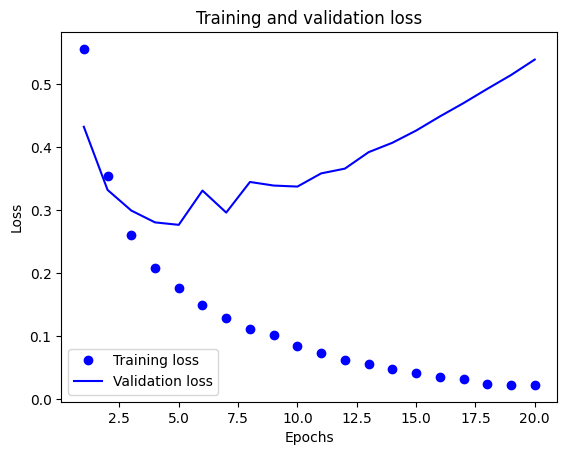

In [ ]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
pd.DataFrame(history.history)

,loss,acc,val_loss,val_acc
0,0.556407,0.757533,0.432635,0.8601
1,0.353585,0.886067,0.332238,0.8796
2,0.259988,0.917067,0.299393,0.8826
3,0.207867,0.931800,0.280577,0.8876
4,0.175484,0.941533,0.276675,0.8850
5,0.149633,0.951467,0.331182,0.8706
6,0.128806,0.959200,0.296158,0.8830
7,0.110683,0.967533,0.344852,0.8710
8,0.101005,0.968400,0.339147,0.8765
9,0.084336,0.977267,0.337509,0.8794


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4581 - accuracy: 0.8108
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2698 - accuracy: 0.9030
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2142 - accuracy: 0.9207
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2943 - accuracy: 0.8822


In [ ]:
results

[0.29433175921440125, 0.8822000026702881]

In [ ]:
 model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.20872535],
       [0.9996032 ],
       [0.9212243 ],
       ...,
       [0.1170381 ],
       [0.11376246],
       [0.6237351 ]], dtype=float32)